In [7]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules

groceries = []
# As the file is in transaction data we will be reading data directly 
with open("/content/groceries.csv") as f:
    groceries = f.read()

In [8]:
# splitting the data into separate transactions using separator as "\n"
groceries = groceries.split("\n")
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [9]:
all_groceries_list = [i for item in groceries_list for i in item]
from collections import Counter

item_frequencies = Counter(all_groceries_list)
# after sorting
#item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])


In [11]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


Text(0, 0.5, 'Count')

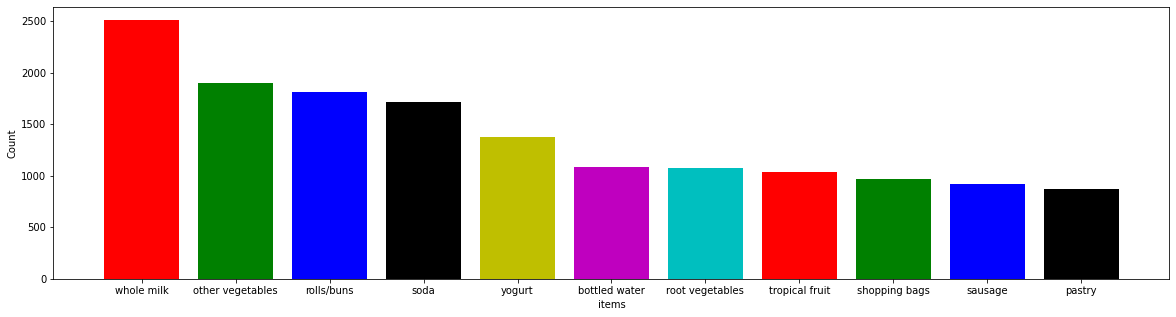

In [21]:
# barplot of top 10 

import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.bar(items[0:11],height = frequencies[0:11],color='rgbkymc');plt.xticks(list(range(0,11),),items[0:11]);plt.xlabel("items")
plt.ylabel("Count")


In [22]:
# Creating Data Frame for the transactions data 

# Purpose of converting all list into Series object Coz to treat each list element as entire element not to separate 
groceries_series  = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


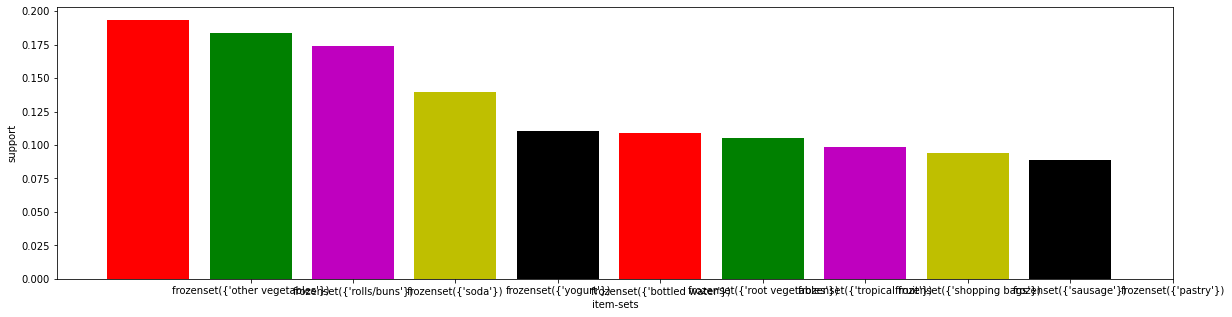

In [27]:
groceries_series.columns = ["transactions"]

# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')

frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)

# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
plt.figure(figsize=(20,5))
plt.bar(items[1:11],height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)

In [29]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2558,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2559,(white bread),(ham),0.042095,0.026029,0.005084,0.120773,4.639851,0.003988,1.107758
2023,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
2018,"(butter, other vegetables)",(whipped/sour cream),0.020031,0.071683,0.005796,0.289340,4.036397,0.004360,1.306275
1313,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406


In [30]:
########################## To eliminate Redudancy in Rules #################################### 
def to_list(i):
    return (sorted(list(i)))


ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)


ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2558,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2023,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
1313,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
2041,"(other vegetables, root vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2203,"(citrus fruit, pip fruit)",(tropical fruit),0.013828,0.104931,0.005592,0.404412,3.854060,0.004141,1.502831
776,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
1469,"(whole milk, whipped/sour cream)",(butter),0.032232,0.055414,0.006711,0.208202,3.757185,0.004925,1.192963
2436,(yogurt),"(curd, tropical fruit)",0.139502,0.010269,0.005287,0.037901,3.690645,0.003855,1.028720
1042,(root vegetables),"(other vegetables, beef)",0.108998,0.019725,0.007931,0.072761,3.688692,0.005781,1.057197
1874,(butter),"(whole milk, domestic eggs)",0.055414,0.029995,0.005999,0.108257,3.609174,0.004337,1.087763
